In [47]:
from texttable import Texttable
from IPython.display import display, Latex
from math import gcd # Greatest common divisor
import matplotlib.pyplot as plt


def format_print(text, color, sep=" ", end="\n"):
    colors = {
        "purple": '\033[95m',
        "cyan": '\033[96m',
        "dark_cyan": '\033[36m',
        "blue": '\033[94m',
        "green": '\033[92m',
        "yellow": '\033[93m',
        "red": '\033[91m',
        "bold": '\033[1m',
        "underline": '\033[4m',
        "end": '\033[0m'
    }
    print(colors[color] + text + colors["end"], sep=sep, end=end)

def extended_list(list, length):
    return list + [""] * (length - len(list))

def reverse_sign(sign):
    return "+" if sign == "-" else "-"

def polynomial(coefficients):
    result = ""
    for i in range(len(coefficients)):
        power = len(coefficients) - i - 1
        if coefficients[i] > 0:
            result += "+"
        if power != 1 and power != 0:
            if coefficients[i] == 1:
                result += f"x^{power}"
            elif coefficients[i] == 0:
                continue
            else:
                result += f"{coefficients[i]}x^{str(power)}"
        elif power == 1:
            if coefficients[i] == 1:
                result += f"x"
            elif coefficients[i] == 0:
                continue
            else:
                result += f"{coefficients[i]}x"
        elif power == 0:
            if coefficients[i] == 0:
                continue
            else:
                result += f"{coefficients[i]}"
    if result[0] == "+":
        result = result[1:]
    return result



def divisors(n):
    if n < 0:
        n = abs(n)
    return [-i for i in range(1, n+1) if n % i == 0] + [i for i in range(1, n+1) if n % i == 0]

def simplify_fraction(numerator, denominator):
    return [numerator // gcd(numerator, denominator), denominator // gcd(numerator, denominator)]


def remove_denominator_if_one(number):
    if number.split("/")[1] == "1":
        return number.split("/")[0]
    else:
        return number


deg=int(input("Enter the degree of the polynomial: "))
coeffs=[]
for i in range(deg+1):
    coeffs.append(int(input("Enter the coefficient of x^"+str(deg-i)+": ")))

leading_coefficient = coeffs[0]

pq_list=[]
for q in divisors(coeffs[0]):
    for p in divisors(coeffs[-1]):
        pq_list.append([p,q])

print("=============")
format_print(color="blue", text=f"The polynomial is: ")
display(Latex(f"${polynomial(coeffs)}$"))


for i in range(len(pq_list)):
    if (pq_list[i][0] > 0 and pq_list[i][1] < 0) or (pq_list[i][0] < 0 and pq_list[i][1] < 0):
        pq_list[i][0] = -pq_list[i][0]
        pq_list[i][1] = -pq_list[i][1]


for i in range(len(pq_list)):
    if type(pq_list[i]) == list:
        pq_list[i] = simplify_fraction(pq_list[i][0], pq_list[i][1])



for i in range(len(pq_list)):
    if pq_list.count(pq_list[i]) > 1:
        pq_list[i] = None
pq_list = [i for i in pq_list if i != None]

pq_list.sort(key=lambda x: abs(x[0]/x[1]))

print("=============")
format_print(color="blue", text=f"The possible roots are: {pq_list}")

roots = {}

t = Texttable()
t.add_row([""] + coeffs)

for pq in pq_list:
    while True:
        numbers = [coeffs[0]]
        for i in range(1, len(coeffs)):
            numbers.append(pq[0]/pq[1] * numbers[i-1] + coeffs[i])
        t.add_row([f"{pq[0]}/{pq[1]}"] + extended_list(numbers, deg+1))
        if numbers[-1] == 0:
            root_key_name = f"{pq[0]}/{pq[1]}"
            roots[root_key_name] = roots[root_key_name] + 1 if root_key_name in roots else 1
            coeffs = numbers[:-1]
        else:
            break

print("=============")
print("Horner's scheme is: ")
print(t.draw())

print("=============")
format_print(color="green", text=f"Roots: ")
for key, value in roots.items():
    format_print(color="green", text=f"{remove_denominator_if_one(key)} is a root {value} times")
print("=============")
print(roots)

The polynomial is: 


<IPython.core.display.Latex object>

The possible roots are: [[-1, 1], [1, 1], [-2, 1], [2, 1], [-4, 1], [4, 1]]
Horner's scheme is: 
+------+---+----+----+
|      | 1 | -3 | -4 |
+------+---+----+----+
| -1/1 | 1 | -4 | 0  |
+------+---+----+----+
| -1/1 | 1 | -5 |    |
+------+---+----+----+
| 1/1  | 1 | -3 |    |
+------+---+----+----+
| -2/1 | 1 | -6 |    |
+------+---+----+----+
| 2/1  | 1 | -2 |    |
+------+---+----+----+
| -4/1 | 1 | -8 |    |
+------+---+----+----+
| 4/1  | 1 | 0  |    |
+------+---+----+----+
| 4/1  | 1 |    |    |
+------+---+----+----+
Roots: 
-1 is a root 1 times
4 is a root 1 times
{'-1/1': 1, '4/1': 1}


Roots for scatter: ['-1', '4']
Roots for plot: ['-3.0', '-1', '1.5', '4', '6.0']
6.0


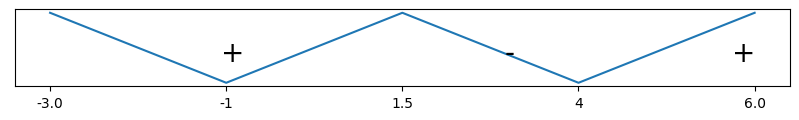

In [53]:
# Get the keys of the roots and store them in a list as many times as the value of the key is
string_roots = []
for key, value in roots.items():
    for i in range(value):
        string_roots.append(remove_denominator_if_one(key))

print("=============")
format_print(color="yellow", text=f"Roots for scatter: {string_roots}")


for i in range(0, len(string_roots) - 1):
    number_to_insert = (float(string_roots[i]) + float(string_roots[i + 1])) / 2
    number_to_insert = str(number_to_insert)
    string_roots.insert(i + 1, number_to_insert)


string_roots = [str(float(string_roots[0]) - 2)] + string_roots + [str(float(string_roots[-1]) + 2)]
y_values = []
for i in range(len(string_roots)):
    if i % 2 == 0:
        y_values.append(1)
    else:
        y_values.append(0)

leading_coefficient_sign = "+" if leading_coefficient > 0 else "-"

print(f"Roots for plot: {string_roots}")
plt.plot(string_roots, y_values)
plt.text(float(string_roots[-1]) / 1.55, 0.3, leading_coefficient_sign, fontsize=20)
plt.text(float(string_roots[-2]) / 1.55, 0.3, reverse_sign(leading_coefficient_sign), fontsize=20)
plt.text(float(string_roots[-3]) / 1.55, 0.3, leading_coefficient_sign, fontsize=20)
print(string_roots[-1])
plt.gca().axes.get_yaxis().set_visible(False)
plt.gcf().set_size_inches(10, 1)
plt.show()